In [4]:
import numpy as np
import sympy as sym
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.collections as clc

In [5]:
#Diffusion solver with fft
c = 10
L = 100
N = 100
dx = L/N
mesh = np.linspace(-L/2,L/2,N, endpoint=False)

DFT_freq = np.fft.fftfreq(N,d=dx)*2*np.pi
u0 = np.exp(-mesh**2/200)
u0_h = np.fft.fft(u0)

dt = 0.1
t = np.arange(0,20,dt)



u0_h_p = np.concatenate((u0_h.real,u0_h.imag)) #Convert the initial value to an array with all the real and complex components in real. 
print(type(u0_h_p[0]))
def diffusion(u_p,t,c,k):
    u_p = u_p[:N] + 1j*u_p[N:] #Obtain back the original array
    du = -c*(np.power(k,2))*u_p
    du = np.concatenate((du.real,du.imag)) #Get the real valued array back, so that it can iterate again
    return du


u_hDe = sp.integrate.odeint(diffusion,u0_h_p,t,args=(c,DFT_freq))

#Menaging the solution
u = []
for i in range(len(t)):
    ui_h = u_hDe[i][:N] + 1j*u_hDe[i][N:] #Convert it back to the u_h form
    ui = np.fft.ifft(ui_h) #Taking the solution by inverse fft
    u.append(ui.real) #taking onyl the real sollution
u = np.array(u)



<class 'numpy.float64'>


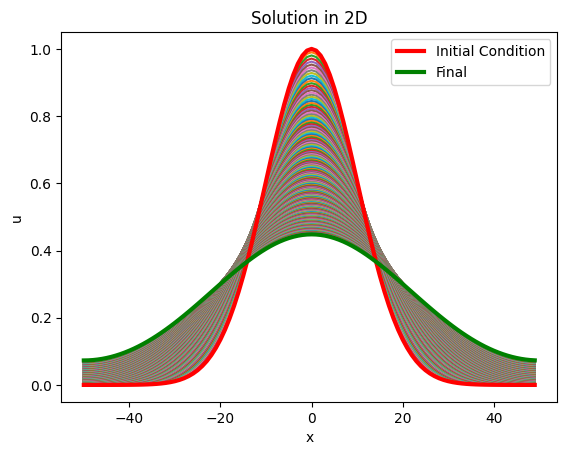

In [6]:
#Plotting The solution
for i in range(len(t)):
    plt.plot(mesh,u[i])


plt.plot(mesh,u[0],"r",label="Initial Condition",linewidth=3.0)
plt.plot(mesh,u[-1],"g",label="Final",linewidth=3.0)
plt.title("Solution in 2D")
plt.xlabel("x")
plt.ylabel("u")
plt.legend()
plt.show()

/tmp/ipykernel_192612/2837383606.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


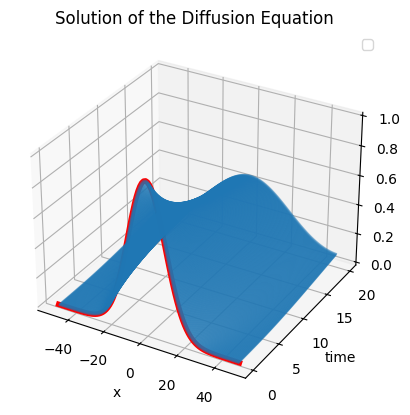

In [7]:
#Creating a 3d plot with the squence of solutions
def plot3d(u,mesh,z):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    
    lines = []
    for i in range(len(t)):
        line = np.array([mesh,u[i]])
        lines.append(np.transpose(line))
    coll = clc.LineCollection(lines,alpha=0.5,linewidths=2.0)
    ax.add_collection3d(coll,zs=t, zdir="y")
    ax.set_xlabel("x")
    ax.set_ylabel("time")
    ax.set_zlabel("u")
    #ax.view_init(0,270+30)
    ax.legend()
    ax.set_title("Solution of the Diffusion Equation")
    ax.plot(mesh,ys=0,zs = u[0], zdir="z", color="r",linewidth=4.0, label="Initial Condition")
    return plt.show()

plot3d(u,mesh,t)
